## Workshop week 7 -- K-means clustering

For this workshop, we will implement the K-means clustering discussed in the lecture. You are encouraged to try and write your own implementation of the algorithm, as this will also be needed for your assessment.

However, for this workshop, you are also allowed to use the `sklearn` implementation of this algorithm.

In [1]:
import numpy as np
import pandas as pd

#### Excercise 1

Download the file `kmeans.csv` from Blackboard. Load the data (containing two attributes), by completing the code snippet below.

How many samples are there in the dataset? (Having correctly loaded the data, the following cell should output the number of samples.)

You can also add a line to shuffle the samples -- this is to show that the order of training samples does not influence the result. (Not doing this should also not influence the rest of your excercises).

In [2]:
def get_data():
    # load the data:
    df = pd.read_csv('kmeans.csv', header=None)
    
    
    # shuffle data rows
    df = df.sample(frac=1).reset_index(drop=True)
    
    
    return df

In [3]:
data = get_data()
print("There are {} samples".format(len(data)))

There are 300 samples


#### Excercise 2

Visualise the data using a scatter plot.

Can you _visually determine_ the number of clusters in the data?

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

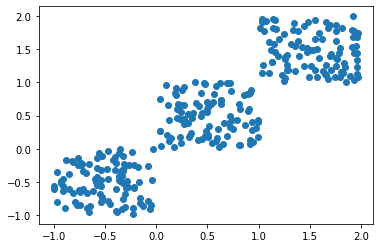

In [5]:
# show the scatter plot of the data
plt.scatter(data[0], data[1])

# plot figure
plt.show()

#### Excercise 3a

Write a 

Write a a function `kmeans_clustering(data, K)` that runs the k-means algorithm on the data, and returns:
- `centroid`: the cluster centres (their coordinated)
- `distance`: the _within-cluster scatter_ of the returned clustering (sum of distances between all samples and their closest cluster centres)
- `cluster_set`: a dictionary mapping each cluster label to a list of samples associated to that cluster

(You can check that your implementation is correct in the **Excercise 3b**.)


You are encouraged to try and write your own implementation from scratch. However, for the workshop, you can also use the `sklearn` implementation of k-means, from:
`from sklearn.cluster import KMeans`

In [6]:
from sklearn.cluster import KMeans
import random
import math

In [40]:
# define kmeans clustering - using sklearn implementation
def kmeans_clustering(data, K):
    
    # define the model
    # (either all variables needed to run k-means -- e.g. initialise K cluster centres)
    # (or load the model from sklearn and initialise it correctly)
    clusters = []
    for i in range(K):
        clusters.append([
            random.uniform(min(data[0]), max(data[0])),
            random.uniform(min(data[1]), max(data[1]))
        ])
    
    # fit the model to the data -- calculate the clustering
    #cluster_map_iterations = []
    counter = 0
    #while(counter == 0 or counter == 1 or cluster_map_iterations[counter - 2] != cluster_map_iterations[counter - 1]):
    cluster_map = {}
    for index, sample in data.iterrows(): # for every sample
        results = [] # will hold sample's distance to cluster centre
        for i in range(len(clusters)): # for every cluster
            results.append(((sample[0] - clusters[i][0])**2) + (sample[1] - clusters[i][1])**2) # save euclid distance
        cluster_map[index] = np.argmin(results) # save closest cluster centre
       # cluster_map_iterations.append(cluster_map)
    
    # assign the points to the cluster sets
    # (note that this is not explicitly needed
    # in the implementation of the algorithm!)
    cluster_set = {}
    
    for index in cluster_map: ## loop through cluster map dict
        cluster_set.setdefault(cluster_map[index],[]).append(index) # add index to cluster list
    
    # calculate the final within-cluster scatter: distance from
    # closest each sample to closest (assigned) cluster centre
    # (to get within-cluster scatter manually:
    # go through different clusters in `cluster_set` and `centroid`s
    # sum distance of every point in the cluster_set to it's centorid
    # return the big sum of sums)
    new_centroids = get_centroids(data, cluster_set)
    print(new_centroids)
        
def get_centroids(data, cluster_set):
    new_centroids = {}
    for cluster_index in cluster_set:
        total_x = 0
        total_y = 0
        for index in cluster_set[cluster_index]:
            total_x = total_x + data.loc[index, 0]
            total_y = total_y + data.loc[index, 1]
        avg_x = total_x / len(cluster_set[cluster_index])
        avg_y = total_y / len(cluster_set[cluster_index])
        
        new_centroids[cluster_index] = [avg_x,avg_y]
    return new_centroids
    
            
    #return centroid, distance, cluster_set
    
    ########## working on getting it all modularised so that I can call and call and repeat parts so it gets better :)

#### Excercise 3b

Run the above code with K=3 (the number of clusters determined visually in **Excercise 1**).

Show a figure with the scatter plot of each of the clusters in a different colour, and also show the calculated cluster centres.

{2: [1.2916616714444442, 1.1327782264583335], 0: [-0.2207299361369863, -0.07471364235616444], 1: [-0.024042686699999996, -0.6532210004999999]}


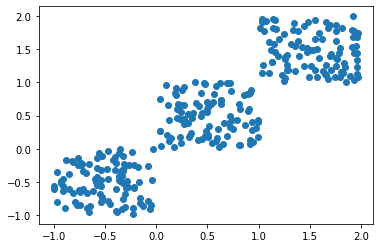

In [42]:
# call k-means on the loaded data
K = 3
#centroid, distance, clusters_set = kmeans_clustering(data, K)
kmeans_clustering(data, K)

plt.scatter(data[0], data[1])

# show plot
plt.show()

Sometimes k can't be determined visually from the data (or the data is too complex to visualise). However, we can visualise the aggregate distance over all the data.

The **aggregate distance** or **within-cluster scatter** is equal to the sum of all data points to their centroid.

Wite a code that would help you visually determined the number of clusters through examining the within-cluster scatter. First, write a function `evaluate_all_k(data, max_k)` which does the following:
- varies the number of clusters k from 1 to `max_k`
- applies k-means to the data for each different k
- calculates the within-cluster scatter for each k (the `kmeans_clustering` function from **Excercise 3a** should already return this distance)
- returns the list of within-cluster scatter values for all k from 1 to `max_k` (in which ever format works for you)

Then, visualise the within-cluster scatter by plotting it against k until `max_k=10` for your data. Look for optimal k, where the sharp inclination stops on the curve ("elbow"). This should match the number of clusters visually identified in **Excercise 1**.

In [30]:
# function to calculate the aggregate distance for a range of k
def evaluate_all_k(data, max_k):
    # ...
    # insert code here
    # ...
    

# calculate distance for k=1...10
max_k = 10
# .. insert your function call here (maybe you return some values?) ..
# evaluate_all_k(data, max_k)

# plot aggregate distance against k
# ...
# insert code here
# ...


# label the axis
plt.xlabel('number of clusters k')
plt.ylabel('within-cluster scatter W')

# show plot
plt.show()

IndentationError: expected an indented block (<ipython-input-30-27ace1e397bb>, line 9)